In [ ]:
import os

# HUST 

In [ ]:
data_folder = r"C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\HUST bearing a practical dataset for ball bearing fault diagnosis\HUST bearing a practical dataset for ball bearing fault diagnosis\HUST bearing dataset"
mat_files = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith('.mat')]
print(mat_files)

In [ ]:
import scipy.io

# Replace 'your_file.mat' with the path to your .mat file
data = scipy.io.loadmat(mat_files[1])
# data = data['DS']

# This will show you the keys, kinda like a map to your data treasure!
print(data.keys())

# To access a specific part of the data, use the key like data['key_name']
# You can plot or analyze it depending on what you're looking for


In [ ]:
print(data['data'])

In [ ]:
import scipy.io
from bokeh.plotting import figure, show, output_notebook

# Extract the 'data' part and flatten it to 1D
plot_data = data['data'].flatten()
# plot_data = data['DS'].flatten()

import numpy as np

# Downsample your data. Change the value of 'n' to adjust the level of downsampling
n = 50
downsampled_x = np.arange(0, len(plot_data), n)
downsampled_y = plot_data[::n]

# Plotting the downsampled data
p = figure(title="Downsampled Vibration Data Visualization", x_axis_label='Index', y_axis_label='Vibration Value')
p.line(downsampled_x, downsampled_y, legend_label="Downsampled Vibration Data", line_width=2)
show(p)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = scipy.io.loadmat(mat_files[0])
vibration_data = data['data'].flatten()

# Sampling frequency 'fs' if provided, otherwise assume a default value
fs = data.get('fs', 1).flatten()[0]

# Perform FFT
fft_result = np.fft.fft(vibration_data, n=10000)

# Compute the frequencies for each FFT result
freqs = np.fft.fftfreq(len(fft_result), 1/fs)

# Get the magnitude of the FFT and corresponding frequencies (ignoring negative frequencies)
fft_magnitude = np.abs(fft_result)[:len(fft_result)//2]
positive_freqs = freqs[:len(freqs)//2]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, fft_magnitude)
plt.title("Frequency Spectrum of Vibration Data")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()


### All files in one graph (SLOW AND UNNECESSARY)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

# Set up the plot
plt.figure(figsize=(12, 8))

# Loop through each file
for file in mat_files:
    # Load data
    data = scipy.io.loadmat(file)
    vibration_data = data['data'].flatten()

    # Perform FFT
    fft_result = np.fft.fft(vibration_data)

    # Compute frequencies
    fs = data.get('fs', 1).flatten()[0]  # Sampling frequency
    freqs = np.fft.fftfreq(len(fft_result), 1/fs)

    # Get magnitude for positive frequencies
    fft_magnitude = np.abs(fft_result)[:len(fft_result)//2]
    positive_freqs = freqs[:len(freqs)//2]

    # Plot
    plt.plot(positive_freqs, fft_magnitude, label=f'FFT of {file}')

# Add legend, title, and labels
# plt.legend()
plt.title("Frequency Spectra of Multiple Datasets")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.yscale('log')  # Optional: Logarithmic scale for better visibility

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import scipy.io

# Your list of file paths
# mat_files = ['path_to_file1.mat', 'path_to_file2.mat', ...]  # Replace with your actual file paths
mat_file = [mat_files[1]]


# Loop through each file
for file in mat_file:
    # Load data
    data = scipy.io.loadmat(file)
    vibration_data = data['data'].flatten()

    # Sampling frequency
    fs = data.get('fs', 1).flatten()[0]
    # print(data.get('ru'))

    # Set up the plot for each file
    plt.figure(figsize=(10, 6))

    # Generate spectrogram
    # NFFT and noverlap are parameters you can tweak according to your data's characteristics
    plt.specgram(vibration_data, NFFT=1024, Fs=fs, noverlap=512, scale='dB')

    # Add title and labels
    plt.title(f"Spectrogram of {file[-9:]}")
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (sec)')

    # Show the plot
    plt.colorbar(label='Intensity [dB]')
    plt.show()


# SCA

In [ ]:
import scipy.io
import numpy as np

In [ ]:
data_folder = r"C:\Users\simon\vibration_analysis\vibration_analysis_nov\data\SCA bearing dataset\SCA bearing dataset\SCA bearing dataset"

mat_files = [os.path.join(data_folder, f"{i+1}", "test.mat") for i in range(len(os.listdir(data_folder)))]

# mat_files = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith('.mat')]
print(mat_files)
SCA_datas = []
for file in mat_files:
    SCA_data = scipy.io.loadmat(mat_files[0])
    SCA_datas.append(SCA_data)
    ds_data = SCA_data['DS']

    print(ds_data['label'])

In [ ]:
# Iterate through each key and print some basic info
for key in SCA_data.keys():
    # Skip the built-in keys that start with '__'
    if not key.startswith('__'):
        print(f"Key: {key}")
        print(f"Type: {type(SCA_data[key])}")
        if hasattr(SCA_data[key], 'shape'):
            print(f"Shape: {SCA_data[key].shape}")
        else:
            print("Not a numpy array or similar data structure.")
        print(f"First few elements: {SCA_data[key].flatten()[:5]}")  # Adjust as needed to avoid large outputs
        print("---")

In [ ]:
# Access the 'DS' key
ds_data = SCA_data['FS']

# Print the structure of 'DS'
print("DS Data Type:", type(ds_data))
print("DS Shape:", ds_data.shape)

# Try to access the first element to understand its structure
first_element = ds_data[0, 0]
print("First Element Type:", type(first_element))

# If it's a structured array, print its fields
if hasattr(first_element, 'dtype'):
    print("Fields in DS:", first_element.dtype.names)

# Inspect the first few elements of each field, handling 1-dimensional arrays
for field in first_element.dtype.names:
    print(f"---\nField: {field}")
    field_content = first_element[field]
    if field_content.ndim > 1:
        # For multi-dimensional arrays
        print("Content:", field_content[0, 0])
    else:
        # For 1-dimensional arrays
        print("Content:", field_content[0])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting the rawData
raw_data = ds_data['rawData'][0, 0].flatten()  # Flattening in case it's not 1D

# Extract the first value of samplingRate as the rate
sampling_rate = float(sampling_rate_data[0, 0])

# Set up the plot
plt.figure(figsize=(10, 6))

# Generate spectrogram
# NFFT and noverlap are parameters you can tweak according to your data's characteristics
plt.specgram(raw_data, NFFT=1024, Fs=sampling_rate, noverlap=512, scale='dB')

# Add title and labels
plt.title("Awesome Spectrogram of Vibration Data")
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')

# Show the plot
plt.colorbar(label='Intensity [dB]')
plt.show()


In [ ]:
print(ds_data['label'])

In [ ]:
# Attempting to inspect the samplingRate structure
sampling_rate_data = ds_data['samplingRate'][0, 0]
print("Sampling Rate Data Type:", type(sampling_rate_data))
print("Sampling Rate Data:", sampling_rate_data)

# If it's an array, let's print its shape and first few elements
if isinstance(sampling_rate_data, np.ndarray):
    print("Sampling Rate Array Shape:", sampling_rate_data.shape)
    print("First few elements of Sampling Rate Array:", sampling_rate_data.flatten()[:5])


# NASA/IMS

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

def load_data(file_path):
    """Loads data from a single file."""
    data = np.loadtxt(file_path)
    return data

def generate_spectrogram(data, fs=20000):
    """Generates a spectrogram from the given data."""
    f, t, Sxx = spectrogram(data, fs)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Spectrogram')
    plt.colorbar(label='Intensity [dB]')
    plt.show()

# Example usage
folder_path = r'C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\IMS\3\3rd_test\4th_test\txt'
file_names = os.listdir(folder_path)

for file_name in file_names[:1]:
    full_path = os.path.join(folder_path, file_name)
    data = load_data(full_path)

    
    for channel in range(data.shape[1]):
        print(f"Generating spectrogram for file {file_name}, channel {channel+1}")
        generate_spectrogram(data[:, channel])


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from datetime import datetime
from tqdm.notebook import tqdm

def load_and_combine_data(folder_path):
    """Loads data from all files and combines them into a single time series per channel."""
    file_names = sorted(os.listdir(folder_path), key=lambda x: datetime.strptime(x, "%Y.%m.%d.%H.%M.%S"))
    combined_data = None

    for file_name in tqdm(file_names, desc="Processing files"):
        full_path = os.path.join(folder_path, file_name)
        data = np.loadtxt(full_path)
        
        if combined_data is None:
            combined_data = data
        else:
            combined_data = np.vstack((combined_data, data))

    return combined_data


def generate_combined_spectrogram(data, fs=20000):
    """Generates a spectrogram from the combined data."""
    for channel in range(data.shape[1]):
        f, t, Sxx = spectrogram(data[:, channel], fs)
        plt.pcolormesh(t, f, 10 * np.log10(Sxx))
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.title(f'Spectrogram - Channel {channel+1}')
        plt.colorbar(label='Intensity [dB]')
        plt.show()

# folder_path = 'path_to_your_data_folder'
combined_data = load_and_combine_data(folder_path)
generate_combined_spectrogram(combined_data)


Processing files:   0%|          | 0/6324 [00:00<?, ?it/s]

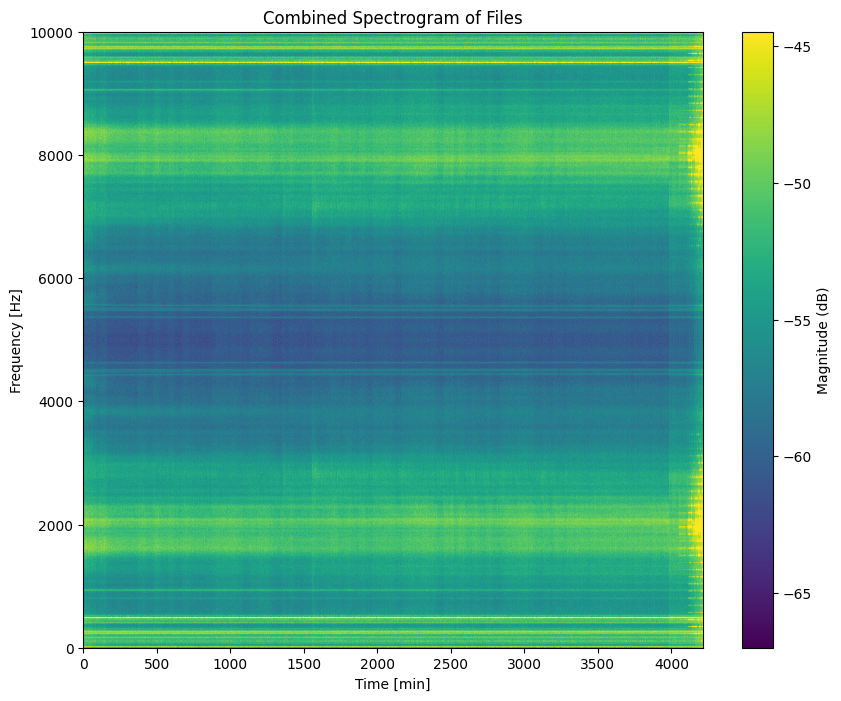

In [15]:
import os
import numpy as np
from datetime import datetime
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

def load_data_and_transform(folder_path, sample_rate=20000):
    """Loads data from all files, performs Fourier Transform, and combines them."""
    file_names = sorted(os.listdir(folder_path), key=lambda x:datetime.strptime(x, "%Y.%m.%d.%H.%M.%S"))
    transforms = [] 
    for file_name in tqdm(file_names, desc="Processing files"):
        full_path = os.path.join(folder_path, file_name)
        data = np.loadtxt(full_path)

        # Perform Fourier Transform on each file's data
        for channel in range(data.shape[1]):
            fft_result = np.fft.fft(data[:, channel])
            transforms.append(fft_result)

    # Combine into a 2D array
    combined_transforms = np.array(transforms).T

    return combined_transforms

def plot_spectrogram(data, fs=20000, file_duration_sec=10):
    """Plots a spectrogram from the combined Fourier Transforms."""
    # Normalize data to have max value close to 1
    data_max = np.abs(data).max()
    if data_max != 0:
        data = data / data_max

    # Now apply logarithmic scaling, adding a small value to avoid log(0)
    magnitude = np.abs(data)
    magnitude_dB = 20 * np.log10(magnitude + 1e-6)  # 1e-6 to avoid log(0)

    plt.figure(figsize=(10, 8))
    plt.imshow(magnitude_dB, aspect='auto', origin='lower', 
               extent=[0, magnitude_dB.shape[1] * file_duration_sec / 60, 0, fs / 2], vmin=np.percentile(magnitude_dB, 5), vmax=np.percentile(magnitude_dB, 95))
    plt.colorbar(label='Magnitude (dB)')
    plt.xlabel('Time [min]')
    plt.ylabel('Frequency [Hz]')
    plt.title('Combined Spectrogram of Files')
    plt.show()

folder_path = r'C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\IMS\3\3rd_test\4th_test\txt'
combined_transforms = load_data_and_transform(folder_path)
plot_spectrogram(combined_transforms)

Processing files:   0%|          | 0/984 [00:00<?, ?it/s]

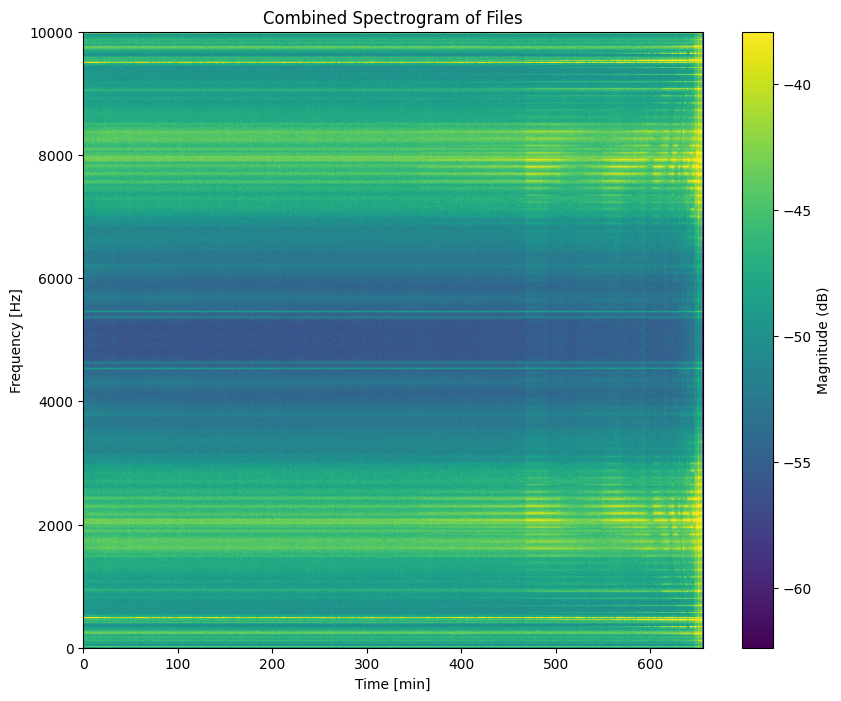

In [16]:
folder_path = r"C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\IMS\2\2nd_test\2nd_test"
combined_transforms = load_data_and_transform(folder_path)
plot_spectrogram(combined_transforms)

Processing files:   0%|          | 0/2156 [00:00<?, ?it/s]

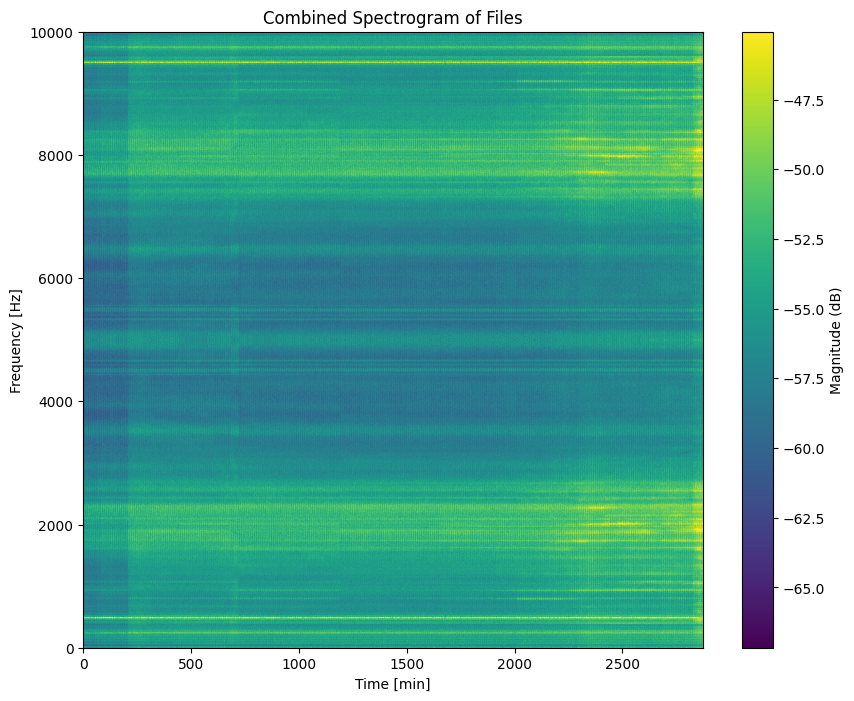

In [17]:
folder_path = r"C:\Users\simon\signal_analysis\vibration_anal\vibration_analysis_nov\data\IMS\IMS\1\1st_test\1st_test"
combined_transforms = load_data_and_transform(folder_path)
plot_spectrogram(combined_transforms)